In [116]:
#essential libraries
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import seaborn as sns

In [117]:
#loading Dataset
data = pd.read_excel('/content/classification_iris.xlsx', header=None).to_numpy()
np.random.shuffle(data)

In [119]:
#Define Activation functions

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def softmax_derivative(x):
    a = softmax(x)
    a = np.reshape(a, (-1, 1))
    b = 1 - softmax(x)
    b = np.reshape(b, (-1, 1))
    return np.diag(np.diag(np.matmul(a, b.T)))

In [120]:
#normalizing Data
min_vals = np.min(data, axis=0)
max_vals = np.max(data, axis=0)
data = (data - min_vals) / (max_vals - min_vals)

In [122]:
#splitting data into train and test
num_train = round(data.shape[0] * 0.7)
num_test = data.shape[0] - num_train
X_test = data[num_train:,:-1]
X_train = data[:num_train,:-1]
Y_train = data[:num_train,-1]
Y_test = data[num_train:,-1]
print(Y_train)

[1.  0.  1.  1.  0.5 0.  0.  1.  1.  0.  0.  0.5 1.  0.  1.  0.  1.  1.
 0.5 1.  0.  0.5 1.  0.  0.5 0.  1.  1.  0.5 0.  0.  0.  0.  0.5 1.  1.
 1.  1.  0.  0.  1.  0.5 1.  1.  1.  1.  1.  0.5 0.5 0.5 0.  0.  1.  0.
 1.  1.  0.5 0.5 0.  1.  0.5 1.  1.  0.5 0.5 0.5 0.  0.  0.  0.5 0.  0.5
 0.5 0.5 0.5 0.  1.  1.  0.  0.5 1.  0.5 0.5 0.  0.  1.  0.  0.5 0.5 0.5
 0.5 0.  1.  0.5 1.  1.  1.  0.5 0.5 1.  0.  1.  1.  1.  0. ]


In [123]:
# defining Y_One_hot
unique_categories = np.unique(Y_test)
identity_matrix = np.eye(len(unique_categories))
Y_test = identity_matrix[np.searchsorted(unique_categories, Y_test)]
Y_train = identity_matrix[np.searchsorted(unique_categories, Y_train)]
print(Y_train.shape)

(105, 3)


In [124]:
listErrorEpoch=[]
n0 = data.shape[1]-1
n1 = 10
n2 = 3
epoch = 300

learning_rate_c = 0.007
learning_rate_2 = 0.008
learning_rate_1 = 0.006

output_data_train = np.zeros((num_train,n2))
output_data_test = np.zeros((num_test,n2))
mse_train = np.zeros((epoch,n2))
mse_test = np.zeros((epoch,n2))
mse_error_train = np.zeros((num_train,n2))
mse_error_test = np.zeros((num_test,n2))

In [129]:
a, b = -1, 1
w1 = np.random.uniform(a, b, (n1, n0))
w_c = np.random.uniform(a, b, (n1, n1))
w2 = np.random.uniform(a, b, (n2, n1))
net1 = np.zeros(n1)
net2 = np.zeros(n2)
o1 = np.zeros(n1)
o2 = np.zeros(n2)
x_c = np.zeros(n1)
o1_K_1 = np.zeros(n1)
#FF
error = np.zeros(n2)
for t in range(epoch):
  total_error = 0
  num_row = 0
  for i in range(num_train):
      if num_row> 2:
        o1_K_1 = np.copy(x_c)
      x_c = np.copy(o1)

      input = X_train[i]
      net1 = w1.dot(input) + w_c.dot(x_c)
      o1 = sigmoid(net1)

      net2 = w2.dot(o1)
      o2 = softmax(net2)

      target = Y_train[i]
      error = target - o2

      f_1 = sigmoid_derivative(net1)
      f_1_diag = np.diagflat(f_1)

      f_2 = softmax_derivative(net2)
      f_2_diag = f_2


      #BP
      w2_k_1 = w2
      w2 += learning_rate_2 * error.reshape(-1,1).T.dot(f_2_diag).T.dot(o1.reshape(-1,1).T)
      w1 += learning_rate_1 * error.reshape(-1,1).T.dot(f_2_diag).dot(w2_k_1).dot(f_1_diag).T.dot(input.reshape(-1,1).T)
      w_c += learning_rate_c *  error.reshape(-1,1).T.dot(f_2_diag).dot(w2_k_1).dot(f_1_diag).T.dot(x_c.reshape(-1,1).T + w_c.dot(o1_K_1).reshape(-1,1).T)
      num_row +=1
  for i in range(num_train):
      # Forward pass
      input = X_train[i]
      net1 = w1.dot(input) + w_c.dot(x_c)
      o1 = sigmoid(net1)

      net2 = w2.dot(o1)
      o2 = softmax(net2)

      mse_error_train[i] = Y_train[i] - o2
      output_data_train[i] = o2

  for i in range(num_test):
      # Forward pass
      input = X_test[i]
      net1 = w1.dot(input) + w_c.dot(x_c)
      o1 = sigmoid(net1)

      net2 = w2.dot(o1)
      o2 = softmax(net2)

      mse_error_test[i] = Y_test[i] - o2
      output_data_test[i] = o2

  mse_train[t] = np.mean(mse_error_train[:,0]**2)
  mse_test[t] = np.mean(mse_error_test[:,0]**2)

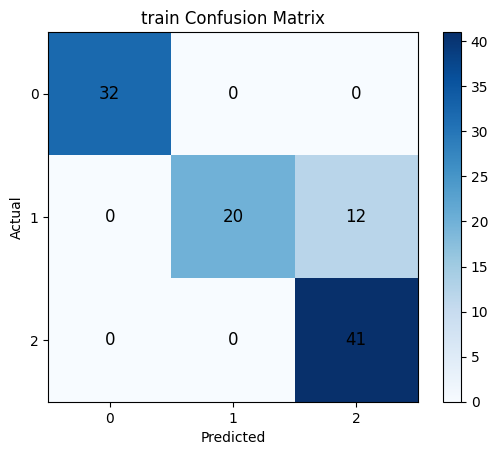

In [130]:
# Assuming you have converted regression predictions to classes
predicted_classes = np.argmax(output_data_train , axis =1)  # Define your conversion function
actual_classes = np.argmax(Y_train, axis=1)  # Replace with your actual test labels

# Define the number of classes
num_classes = 3  # Modify this based on your classification

# Create a confusion matrix-like matrix
confusion_matrix = np.zeros((num_classes, num_classes))

# Fill the confusion matrix
for actual, predicted in zip(actual_classes, predicted_classes):
    confusion_matrix[actual][predicted] += 1

# Plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('train Confusion Matrix')
plt.colorbar()

# Annotate the plot with numbers
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(int(confusion_matrix[i, j])), fontsize=12, ha='center', va='center')  # Corrected

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))

plt.show()



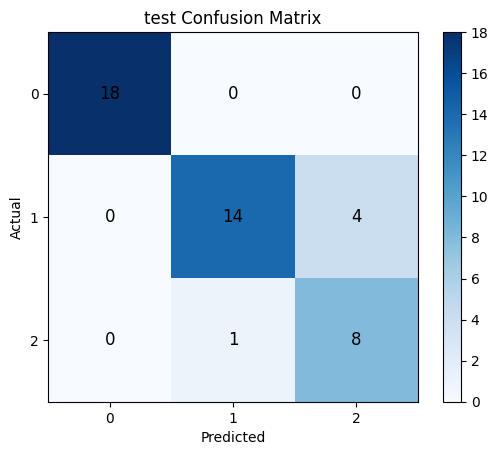

In [128]:
# Assuming you have converted regression predictions to classes
predicted_classes = np.argmax(output_data_test , axis =1)  # Define your conversion function
actual_classes = np.argmax(Y_test, axis=1)  # Replace with your actual test labels

# Define the number of classes
num_classes = 3  # Modify this based on your classification

# Create a confusion matrix-like matrix
confusion_matrix = np.zeros((num_classes, num_classes))

# Fill the confusion matrix
for actual, predicted in zip(actual_classes, predicted_classes):
    confusion_matrix[actual][predicted] += 1

# Plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('test Confusion Matrix')
plt.colorbar()

# Annotate the plot with numbers
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(int(confusion_matrix[i, j])), fontsize=12, ha='center', va='center')  # Corrected

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))

plt.show()

